# Naive Bayes Classification

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [5]:
from sklearn.datasets import make_blobs

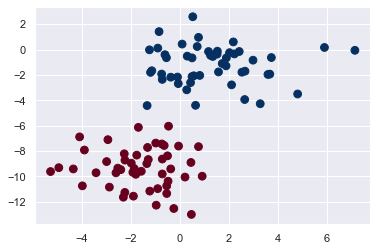

In [94]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='RdBu')

In [95]:
X

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691],
       [  1.90846569,  -0.6583068 ],
       [  2.99659881,  -0.83960814],
       [ -1.75036425,  -8.32495776],
       [  1.26386427,  -0.46380574],
       [ -2.92821038,  -7.10474478],
       [ -1.18679697,  -1.80057881],
       [ -0.70730261,  -8.6320622 ],
       [ -0.597949  ,  -0.40605237],
       [ -3.88704121,  -7.92023943],
       [ -0.49365731,  -8.378556  ],
       [ -0.97378999,  -7.371431  ],
       [  0.7183647 ,   0.23622995],
       [  1.355409  ,  -0.54741367],
       [ -0.47151448, -10.37571491],
       [ -0.95592795, -12.26939394],
       [ -2.5972638 ,  -9.71612662],
       [  0.44653092,  -2.60752136],
 

In [96]:
X.shape

(100, 2)

In [97]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
model = GaussianNB()

In [75]:
model.fit(X, y)

GaussianNB()

In [76]:
X_new = [-6, -14] + [14, 18] * np.random.rand(2000, 2)

In [88]:
y_model = model.fit(X, y).predict(X_new)
y_model

array([1, 0, 1, ..., 1, 0, 0])

(-6.694603237998156, 8.686893406600744, -14.889964076978249, 4.899353013271125)

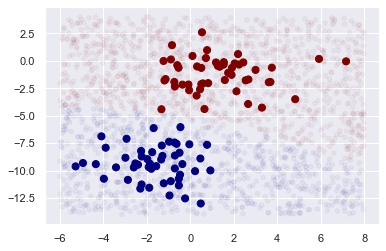

In [81]:
plt.scatter(X[:,0], X[:, 1], c=y,s=50, cmap='jet')
plt.scatter(X_new[:,0], X_new[:, 1], c=y_model,s=20, cmap='jet', alpha=0.04)
lim = plt.axis()
plt.axis(lim)

### predict_proba method:

In [83]:
yprob = model.predict_proba(X_new) 
yprob[-8:].round(2)


array([[0.  , 1.  ],
       [0.12, 0.88],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [84]:
yprob.shape

(2000, 2)

# Multinomial Naive Bayes

### Example: Classifying text

In [99]:
from sklearn.datasets import fetch_20newsgroups

In [104]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [105]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space','comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [107]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [116]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [118]:
label = model.fit(train.data, train.target).predict(test.data)


In [120]:
from sklearn.metrics import confusion_matrix

In [121]:
mat= confusion_matrix(test.target, label)

<AxesSubplot:>

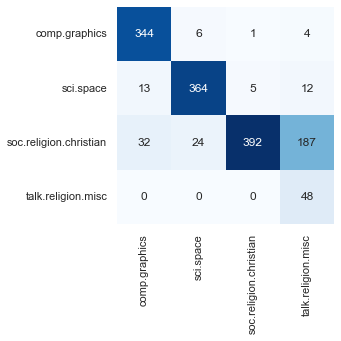

In [125]:
sns.heatmap(mat.T, cbar=False, square=True, annot=True, xticklabels= train.target_names, yticklabels=train.target_names, fmt='d', cmap='Blues')

In [130]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [131]:
predict_category('i like space')

'sci.space'

In [132]:
predict_category('i dont believe in god')

'soc.religion.christian'

In [133]:
predict_category('do you know i dont like chicken')

'soc.religion.christian'

In [134]:
predict_category('earth is getting worse everyday')

'sci.space'